<div style="text-align: center">
    <img src="../../_static/xcdat-logo.png" alt="xCDAT logo" style="display: inline-block; width:600px;">
</div>

# LLNL Climate and Weather Seminar Series (01/25/2023) - A Gentle Introduction to xCDAT

<h3 style="text-align: left;">"A Python package for simple and robust climate data analysis."</h3>
<h4 style="text-align: left; font-style:italic">Core Developers: Tom Vo, Stephen Po-Chedley, Jason Boutte, Jill Zhang, Jiwoo Lee</h4>
<p style="text-align: left;">With thanks to Peter Gleckler, Paul Durack, Karl Taylor, and Chris Golaz</p>

Updated: 03/18/25 [v0.8.0]

_This work is performed under the auspices of the U. S. DOE by Lawrence Livermore National Laboratory under contract No. DE-AC52-07NA27344._


## Presentation Overview

Intended audience: Some or no familiarity with `xarray` and/or `xcdat`

1. **Driving force** behind xCDAT
2. **Goals and milestones** of CDAT's successor
3. Introducing xCDAT
4. Understanding the **basics of Xarray**
5. How **xCDAT extends Xarray** for climate data analysis
6. Technical design philosophy and APIs
7. **Demo** of capabilities
8. How to **get involved**


### Notebook Kernel Setup

Users can [install their own instance of xcdat](../getting-started-guide/installation.rst) and follow these examples using their own environment (e.g., with VS Code, Jupyter, Spyder, iPython) or [enable xcdat with existing JupyterHub instances](../getting-started-guide/getting-started-hpc-jupyter.rst).

First, create the conda environment:

```bash
conda create -n xcdat_notebook -c conda-forge xcdat xesmf matplotlib ipython ipykernel cartopy nc-time-axis gsw-xarray jupyter pooch
```

Then install the kernel from the `xcdat_notebook` environment using `ipykernel` and name the kernel with the display name (e.g., `xcdat_notebook`):

```bash
python -m ipykernel install --user --name xcdat_notebook --display-name xcdat_notebook
```

Then to select the kernel `xcdat_notebook` in Jupyter to use this kernel.


## The Driving Force Behind xCDAT

- The **CDAT (Community Data Analysis Tools)** library has provided a suite of robust and comprehensive open-source climate data analysis and visualization packages for over **20 years**
- A driving **need** for a **modern successor**
  - Focus on a maintainable and extensible library
  - Serve the needs of the climate community in the long-term

 <div style="text-align: center">
    <img src="../../_static/cdat-logo.png" alt="CMIP6 logo" style="display: inline-block; margin-right:50px; width:400px">
    <img src="../../_static/cmip-logo.jpg" alt="CMIP6 logo" style="display: inline-block; width:400px">
    
</div>


## Goals and Milestones for CDAT's Successor

1. **Offer similar core capabilities**

   1. _For example geospatial averaging, temporal averaging, and regridding_

2. Use **modern technologies** in the library’s stack

   1. Support parallelism and lazy operations

3. Be **maintainable**, **extensible**, and **easy-to-use**

   1. Python Enhancement Proposals (PEPs)
   2. Automate DevOps processes (unit testing, code coverage)
   3. Actively maintain documentation

4. **Cultivate an open-source community** that can sustain the project

   1. Encourage GitHub contributions
   2. Community engagement efforts (e.g., Pangeo, ESGF)


## Introducing xCDAT

- xCDAT is an **extension of xarray** for **climate data analysis** on **structured grids**
- **Goal** of providing features and utilities for **simple and robust analysis of climate data**
- Jointly developed by scientists and developers from:
  - **E3SM Project** (Energy Exascale Earth System Model Project)
  - **PCMDI** (Program for Climate Model Diagnosis and Intercomparison)
  - **SEATS Project** (Simplifying ESM Analysis Through Standards Project)
  - Users around the world **via** **GitHub**

<div style="text-align: center; margin-top:10px">
<img src="../../_static/e3sm-logo.jpg" alt="E3SM logo" align=\"center\" style="display: inline-block;     margin-right:100px; width:300px;">
<img src="../../_static/pcmdi-logo.png" alt="PCMDI logo" style="display: inline-block; margin-right:100px; width:300px;">
<img src="../../_static/seats-logo.png" alt="SEATS logo" style="display: inline-block; width:300px;">

</div>


## Before We Dive Deeper, Let's Talk About Xarray

- Xarray is an evolution of an internal tool developed at The Climate Corporation
- Released as open source in May 2014
- **NumFocus** fiscally sponsored project since August 2018

<div style="text-align: center">
    <img src="../../_static/xarray-logo.png" alt="xarray logo" style="display: inline-block; margin-right: 50px; width:400px;">
    <img src="../../_static/NumFocus-logo.png" alt="NumFOCUS logo" style="display: inline-block; width:400px">
</div>


## Key Features and Capabilities in Xarray

- **“N-D labeled arrays and datasets in Python”**
  - Built upon and extends NumPy and pandas
- **Interoperable with scientific Python ecosystem** including **NumPy, Dask, Pandas, and Matplotlib**
- Supports file I/O, indexing and selecting, interpolating, grouping, aggregating, parallelism (Dask), plotting (matplotlib wrapper)
  - Supported formats include: netCDF, Iris, OPeNDAP, Zarr, and GRIB

<!-- <div style="text-align: center">
<img src="../../_static/numpy-logo.svg" alt="NumPy logo" style="display: inline-block; width:300px; margin-right: 50px">
<img src="../../_static/pandas-logo.svg" alt="Pandas logo" style="display: inline-block; width:300px; margin-right: 50px">
    <img src="../../_static/dask-logo.svg" alt="Dask logo" style="display: inline-block; width:300px">
</div> -->

Source: <cite>https://xarray.dev/#features</cite>


## Why use Xarray?

> _"Xarray introduces **labels** in the form of **dimensions, coordinates and attributes** on **top of raw NumPy-like
> multidimensional arrays**, which allows for a **more intuitive, more concise, and less error-prone developer
> experience**."_
>
> &mdash; <cite> https://xarray.pydata.org/en/v2022.10.0/getting-started-guide/why-xarray.html</cite>


- **Apply operations over dimensions by name**
  - `x.sum('time')`
- **Select values by label** (or logical location) instead of integer location
  - `x.loc['2014-01-01']` or `x.sel(time='2014-01-01')`
- **Mathematical operations vectorize across multiple dimensions** (array broadcasting) based on **dimension names**, not shape
  - `x - y`
- Easily use the **split-apply-combine paradigm** with **groupby**
  - `x.groupby('time.dayofyear').mean()`.
- **Database-like alignment** based on coordinate labels that **smoothly handles missing values**
  - `x, y = xr.align(x, y, join='outer')`
- Keep track of **arbitrary metadata in** the form of a **Python dictionary**
  - `x.attrs`

Source: <cite>https://docs.xarray.dev/en/v2022.10.0/getting-started-guide/why-xarray.html#what-labels-enable</cite>


## The Xarray Data Models

> "Xarray data models are **borrowed from netCDF file format**, which provides xarray with a **natural and portable
> serialization format**."
>
> &mdash; <cite>https://docs.xarray.dev/en/latest/getting-started-guide/why-xarray.html</cite>


1. **`xarray.Dataset`**

   - A **dictionary-like container** of **DataArray objects** with **aligned dimensions**
     - **DataArray** objects are **classified** as **"coordinate variables"** or **"data variables"**
     - All **data variables** have a **shared union of coordinates**
   - Serves a similar purpose to a `pandas.DataFrame`

2. **`xarray.DataArray`**
   - A class that attaches **dimension names**, **coordinates**, and **attributes** to **multi-dimensional arrays** (aka "labeled arrays")
   - An N-D generalization of a `pandas.Series`


<div style="text-align: center">
    <img src="../../_static/dataset-diagram.webp" alt="xarray logo" style="display: inline-block; width:1000px">
</div>


### Exploring the Xarray Data Models

The data used in this example can be found in the [xcdat-data repository](https://github.com/pydata/xcdat-data).


In [1]:
# This style import is necessary to properly render Xarray's HTML output with
# the Jupyer RISE extension.
# GitHub Issue: https://github.com/damianavila/RISE/issues/594
# Source: https://github.com/smartass101/xarray-pydata-prague-2020/blob/main/rise.css

from IPython.core.display import HTML

style = """
<style>
.reveal pre.xr-text-repr-fallback {
    display: none;
}
.reveal ul.xr-sections {
    display: grid
}

.reveal ul ul.xr-var-list {
    display: contents
}
</style>
"""


HTML(style)

In [2]:
import xcdat as xc

ds = xc.tutorial.open_dataset("tas_amon_access")

/opt/miniconda3/envs/xcdat_notebook/lib/python3.13/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


### The `Dataset` Model


In [3]:
ds

<xarray.Dataset> Size: 7MB
Dimensions:    (time: 60, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * lat        (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
    height     float64 8B 2.0
  * time       (time) object 480B 1870-01-16 12:00:00 ... 1874-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 960B ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 7MB ...
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           87658.0
    creation_date:                   2020-06-05T04:06:11Z
    ...                              ...
    variant_label:                   r10i1p1f1
    version:                         v20200605
    license:                         CMIP6 model data produced by CSIRO is li...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/af78ae5e-f3a6-4e99-8cfe-5f2...
    DODS_EXTRA.Unlimited_Dimension:  time

**A dictionary-like container of labeled arrays (DataArray objects) with aligned dimensions.**

Key properties:

- `dims`: a **dictionary** mapping from **dimension names** **to** the **fixed length** of each dimension (e.g., {'x': 6, 'y': 6, 'time': 8})
- `coords`: **a dict-like container** of **DataArrays** intended to **label points** used in **`data_vars`** (e.g., arrays of numbers, datetime objects or strings)
- `data_vars`: **a dict-like container** of **DataArrays** corresponding to **variables**
- `attrs`: **dict** to hold arbitrary **metadata**

Source: <cite>https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataset</cite>


### The `DataArray` Model


In [4]:
ds.tas

<xarray.DataArray 'tas' (time: 60, lat: 145, lon: 192)> Size: 7MB
[1670400 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height   float64 8B 2.0
  * time     (time) object 480B 1870-01-16 12:00:00 ... 1874-12-16 12:00:00
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-06-05T04:06:10Z altered by CMOR: Treated scalar dime...
    _ChunkSizes:    [  1 145 192]

**A class that attaches dimension names, coordinates, and attributes to multi-dimensional arrays (aka "labeled arrays")**

Key properties:

- `values`: a **numpy.ndarray** holding the array’s **values**
- `dims`: **dimension names** for each **axis** (e.g., ('x', 'y', 'z'))
- `coords`: a **dict-like container** of **arrays (coordinates)** that **label each point** (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
- `attrs`: **dict** to hold arbitrary **metadata **(attributes)

Source: <cite>https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataarray</cite>


## Resources for Learning Xarray

- Here are some highly recommended resources:
  - [Xarray Tutorial](https://tutorial.xarray.dev/intro.html)
  - ["Xarray in 45 minutes"](https://tutorial.xarray.dev/overview/xarray-in-45-min.html#)
  - [Xarray Documentation](https://docs.xarray.dev/en/stable/index.html)
  - [Xarray API Reference](https://docs.xarray.dev/en/stable/api.html)


## xCDAT Extends Xarray for Climate Data Analysis

- **Some key xCDAT features** are inspired by or ported **from the core CDAT library**
  - _e.g., spatial averaging, temporal averaging, regrid2 for horizontal regridding_
- Other features **leverage powerful libraries** in the **xarray ecosystem**

  - **xESMF** for horizontal regridding
  - **xgcm** for vertical interpolation
  - **CF-xarray** for CF convention metadata interpretation

- xCDAT strives to **support datasets** **CF compliant** and **common non-CF compliant metadata** (_time units in “months since …” or “years since …”_)
- Inherent support for **lazy operations** and **parallelism** through **xarray + dask**

<div style="text-align: center; margin-top:10px">
    <img src="../../_static/esmf-logo.png" alt="esmf logo" style="display: inline-block; margin-right:50px; width:400px;">
    <img src="../../_static/CF-xarray.png" alt="cf-xarray logo" style="display: inline-block; margin-right:50px; width:400px;">
     <img src="../../_static/dask-logo.png" alt="dask logo" style="display: inline-block; width:400px;">

</div>


## The Technical Design Philosophy

- **Streamline the user experience** of developing code to analyze climate data
- **Reduce the complexity and overhead** for implementing certain features with xarray (_e.g., temporal averaging, spatial averaging_)
- Encourage **reusable functionalities** through a **single library**


## Leveraging the APIs

xCDAT provides public APIs in two ways:

1. Top-level APIs functions
   - e.g., `xcdat.open_dataset()`, `xcdat.center_times()`
   - Usually for opening datasets and performing dataset level operations
2. Accessor classes
   - xcdat provides `Dataset` accessors, which are **implicit namespaces for custom functionality**.
   - Accessor **namespaces** clearly identifies **separation from built-in xarray methods**.
   - Operate on variables within the `xr.Dataset`
   - e.g., `ds.spatial`, `ds.temporal`, `ds.regridder`

<div style="text-align: center; margin-top: 10px">
    <figure>
    <img src="../../_static/accessor_api.svg" alt="xcdat accessor" style="display: inline-block; width:75%">
        <figcaption style="font-style: italic">xcdat spatial functionality is exposed by chaining the <span style="background-color: #e4e6e8">.spatial</span> accessor attribute to the <span style="background-color: #e4e6e8">xr.Dataset</span> object.</figcaption>
    </figure>
</div>

Source: <cite>https://xcdat.readthedocs.io/en/latest/api.html</cite>


## Key Features in xCDAT

<style type="text/css">
table td, table th {
    border: 1px solid lightgray;
}
</style>

<table>
    <tr>
        <td>Feature</td>
        <td>API</td>
        <td>Description</td>
    </tr>
    <tr>
        <td>Extend `xr.open_dataset()` and `xr.open_mfdataset()`</td>
        <td>
            <ul>
                <li>`open_dataset()`</li>
                <li>`open_mfdataset()`</li>
            </ul>
        </td>
        <td>
            <ul>
                <li>Bounds generation</li>
                <li>Time decoding (CF and select non-CF time units)</li>
                <li>Centering of time coordinates</li>
                <li>Conversion of longitudinal axis orientation</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>Temporal averaging</td>
        <td>
            <ul>
                <li>`ds.temporal.average()`</li>
                <li>`ds.temporal.group_average()`</li>
                <li>`ds.temporal.climatology()`</li>
                <li>`ds.temporal.departures()`</li>
            </ul>
        <td>
            <ul>
                <li>Single snapshot and group average</li>
                <li>Climatology and departure</li>
                <li>Weighted or unweighted</li>
                <li>Optional seasonal configuration< (e.g., custom seasons)</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>Geospatial averaging</td>
        <td>`ds.spatial.average()`</td>
        <td>
            <ul>
                <li>Rectilinear grids</li>
                <li>Weighted</li>
                <li>Optional specification of region domain</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>Horizontal regridding</td>
        <td>`ds.regridder.horizontal()`</td>
         <td>
            <ul>
                <li>Rectilinear and curvilinear grids</li>
                <li>Extends xESMF horizontal regridding</li>
                <li>Python implementation of regrid2</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>Vertical regridding</td>
        <td>`ds.regridder.vertical()`</td>
        <td>
            <ul>
                <li>Transform vertical coordinates</li>
                <li>Extends xgcm vertical interpolation</li>
                <li>Linear, logarithmic, and conservative interpolation</li>
                <li>Decode parametric vertical coordinates if required</li>
            </ul>
        </td>
    </tr>
</table>


## A Demo of xCDAT Capabilities

- Prerequisites
  - Installing `xcdat`
  - Import `xcdat`
  - Open a dataset and apply postprocessing operations
- Scenario 1 - Calculate the spatial averages over the tropical region
- Scenario 2 - Calculate temporal average
- Scenario 3 - Horizontal regridding (bilinear, gaussian grid)


### Installing `xcdat`

xCDAT is available on Anaconda under the `conda-forge` channel (https://anaconda.org/conda-forge/xcdat)

Two ways to install `xcdat` with recommended dependencies (`xesmf`):

1. Create a conda environment from scratch (`conda create`)

   ```bash
   conda create -n <ENV_NAME> -c conda-forge xcdat
   conda activate <ENV_NAME>
   ```

2. Install `xcdat` in an existing conda environment (`conda install`)

   ```bash
   conda activate <ENV_NAME>
   conda install -c conda-forge xcdat
   ```

_Source_: <cite>https://xcdat.readthedocs.io/en/latest/getting-started.html</cite>


### Open the example dataset


In [5]:
# This gives access to all xcdat public top-level APIs and accessor classes.
import xcdat as xc

# We import these packages specifically for plotting. It is not required to use xcdat.
import matplotlib.pyplot as plt

ds = xc.tutorial.open_dataset("tas_amon_access")


In [6]:
ds

<xarray.Dataset> Size: 7MB
Dimensions:    (time: 60, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * lat        (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
    height     float64 8B 2.0
  * time       (time) object 480B 1870-01-16 12:00:00 ... 1874-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 960B ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 7MB ...
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           87658.0
    creation_date:                   2020-06-05T04:06:11Z
    ...                              ...
    variant_label:                   r10i1p1f1
    version:                         v20200605
    license:                         CMIP6 model data produced by CSIRO is li...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/af78ae5e-f3a6-4e99-8cfe-5f2...
    DODS_EXTRA.Unlimited_Dimension:  time

### Scenario 1: Spatial Averaging

Related accessor: `ds.spatial`

In this example, we **calculate the spatial average** of `tas` over the tropical region and **plot the first 100 time steps**.


In [7]:
ds_trop_avg = ds.spatial.average("tas", axis=["X","Y"], lat_bounds=(-25,25))
ds_trop_avg.tas

<xarray.DataArray 'tas' (time: 60)> Size: 480B
array([298.15066665, 298.45643688, 298.91178299, 299.25626349,
       299.16840672, 298.6547562 , 298.43393454, 298.5229462 ,
       298.87526485, 299.02375463, 298.82985072, 298.37942098,
       298.10698491, 298.63591211, 299.17278709, 299.44555591,
       299.33618816, 298.9410899 , 298.65229995, 298.67067453,
       298.83325478, 298.93872858, 298.78775086, 298.30228323,
       298.23228154, 298.45220342, 298.84972967, 299.1828884 ,
       299.14735499, 298.66339112, 298.54539836, 298.60184201,
       298.85660077, 298.90817328, 298.69314394, 298.28706375,
       298.11105021, 298.46196689, 298.91466799, 299.16737761,
       299.16280892, 298.84728338, 298.5139916 , 298.6725403 ,
       298.92108179, 298.99422174, 298.85095438, 298.26533568,
       298.19155299, 298.49788779, 298.87120472, 299.06917604,
       298.98923901, 298.70204766, 298.284927  , 298.37238616,
       298.58491674, 298.58072934, 298.41356444, 297.95680103])
Coordinates:
    height   float64 8B 2.0
  * time     (time) object 480B 1870-01-16 12:00:00 ... 1874-12-16 12:00:00
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-06-05T04:06:10Z altered by CMOR: Treated scalar dime...
    _ChunkSizes:    [  1 145 192]

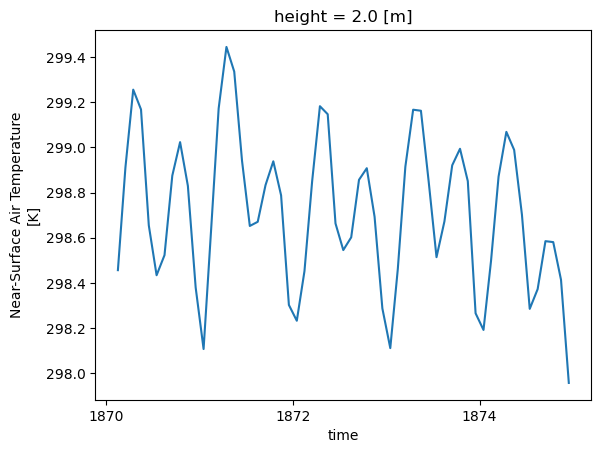

In [8]:
ds_trop_avg.tas.isel(time=slice(1, 100)).plot()

### Scenario 2: Calculate temporal average

Related accessor: `ds.temporal`

In this example, we calculate the **temporal average of `tas` as a single snapshot** (time dimension is collapsed).


In [9]:
ds_avg = ds.temporal.average("tas", weighted=True)
ds_avg.tas

<xarray.DataArray 'tas' (lat: 145, lon: 192)> Size: 223kB
array([[224.81210109, 224.81210109, 224.81210109, ..., 224.81210109,
        224.81210109, 224.81210109],
       [228.03158289, 227.99401377, 227.95698611, ..., 228.14247135,
        228.10593314, 228.06993435],
       [228.98863728, 228.87791604, 228.7687391 , ..., 229.3356992 ,
        229.21915511, 229.10334963],
       ...,
       [254.27924772, 254.306979  , 254.3356117 , ..., 254.18933785,
        254.22209193, 254.25007918],
       [254.16163465, 254.17332466, 254.18473972, ..., 254.12207198,
        254.13266637, 254.14625498],
       [253.78138151, 253.78138151, 253.78138151, ..., 253.78138151,
        253.78138151, 253.78138151]])
Coordinates:
  * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height   float64 8B 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-06-05T04:06:10Z altered by CMOR: Treated scalar dime...
    _ChunkSizes:    [  1 145 192]
    operation:      temporal_avg
    mode:           average
    freq:           month
    weighted:       True

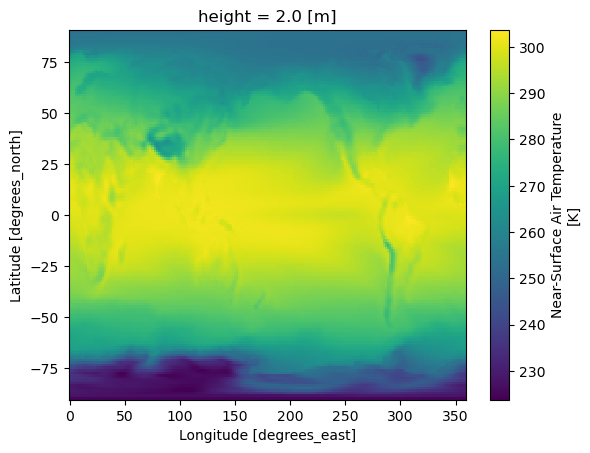

In [10]:
ds_avg.tas.plot(label="weighted")

### Scenario 3: Horizontal Regridding

Related accessor: `ds.regridder`

In this example, we will generate a gaussian grid with 32 latitudes to regrid our input data to.


#### Create the output grid


In [11]:
output_grid = xc.create_gaussian_grid(32)
output_grid

<xarray.Dataset> Size: 2kB
Dimensions:   (lon: 65, bnds: 2, lat: 32)
Coordinates:
  * lon       (lon) float64 520B 0.0 5.625 11.25 16.88 ... 348.8 354.4 360.0
  * lat       (lat) float64 256B 85.76 80.27 74.74 ... -74.74 -80.27 -85.76
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 1kB -2.812 2.812 2.812 ... 357.2 357.2 362.8
    lat_bnds  (lat, bnds) float64 512B 90.0 83.21 83.21 ... -83.21 -83.21 -90.0

#### Plot the Input vs. Output Grid


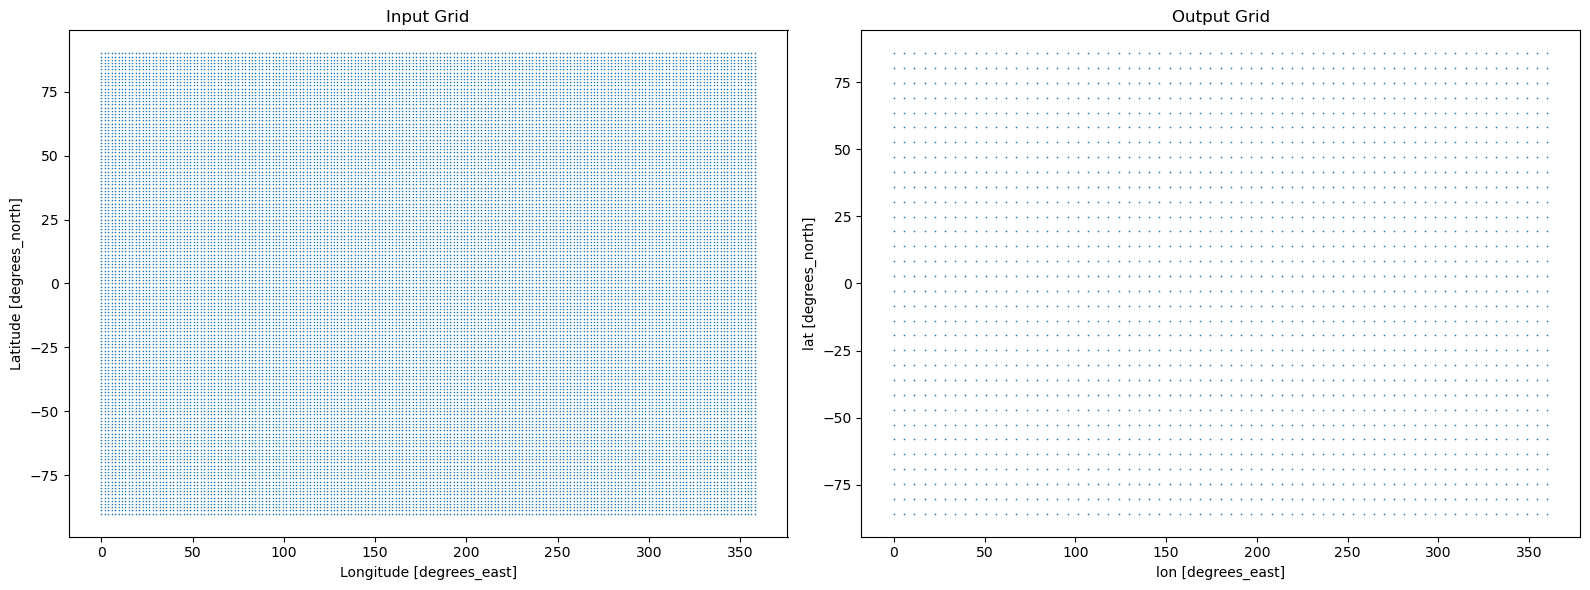

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

input_grid = ds.regridder.grid
input_grid.plot.scatter(x='lon', y='lat', s=5, ax=axes[0], add_colorbar=False, cmap=plt.cm.RdBu)
axes[0].set_title('Input Grid')

output_grid.plot.scatter(x='lon', y='lat', s=5, ax=axes[1], add_colorbar=False, cmap=plt.cm.RdBu)
axes[1].set_title('Output Grid')

plt.tight_layout()

#### Regrid the data

xCDAT offers horizontal regridding with `xESMF` (default) and a Python port of `regrid2`.
We will be using `xESMF` to regrid.


In [13]:
# xesmf supports "bilinear", "conservative", "nearest_s2d", "nearest_d2s", and "patch"
output = ds.regridder.horizontal('tas', output_grid, tool='xesmf', method='bilinear')

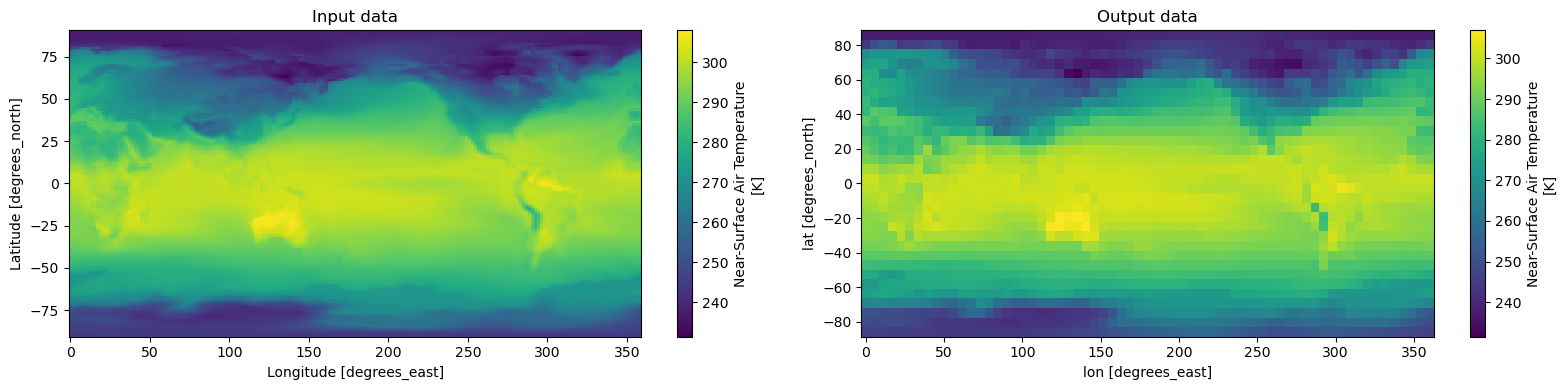

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ds.tas.isel(time=0).plot(ax=axes[0])
axes[0].set_title('Input data')

output.tas.isel(time=0).plot(ax=axes[1])
axes[1].set_title('Output data')

plt.tight_layout()

## Parallelism with Dask

<div style="text-align:center">
  <img src="../../_static/dask-logo.svg" alt="Dask logo" style="display: inline-block; width:300px;">
</div>

> Nearly all existing xarray methods have been extended to work automatically with Dask arrays for parallelism
>
> &mdash; <cite>https://docs.xarray.dev/en/stable/user-guide/dask.html#using-dask-with-xarray</cite>


- Parallelized xarray methods include **indexing, computation, concatenating and grouped operations**
- xCDAT APIs that build upon xarray methods inherently support Dask parallelism
  - Dask arrays are loaded into memory only when absolutely required (e.g., generating weights for averaging)


In [15]:
# Use .chunk() to activate Dask arrays
# NOTE: `open_mfdataset()` automatically chunks by the number of files, which
# might not be optimal.
ds = xc.tutorial.open_dataset("tas_amon_access", chunks={"time": "auto"})
ds

<xarray.Dataset> Size: 7MB
Dimensions:    (time: 60, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * lat        (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
    height     float64 8B ...
  * time       (time) object 480B 1870-01-16 12:00:00 ... 1874-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 960B dask.array<chunksize=(60, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 2kB dask.array<chunksize=(145, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 7MB dask.array<chunksize=(60, 145, 192), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           87658.0
    creation_date:                   2020-06-05T04:06:11Z
    ...                              ...
    variant_label:                   r10i1p1f1
    version:                         v20200605
    license:                         CMIP6 model data produced by CSIRO is li...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/af78ae5e-f3a6-4e99-8cfe-5f2...
    DODS_EXTRA.Unlimited_Dimension:  time

### Further Dask Guidance

Visit these pages for more guidance (e.g., when to parallelize):

- Parallel computing with Dask (xCDAT): https://xcdat.readthedocs.io/en/latest/examples/parallel-computing-with-dask.html
- Parallel computing with Dask (Xarray): https://docs.xarray.dev/en/stable/user-guide/dask.html
- Xarray with Dask Arrays: https://examples.dask.org/xarray.html


## Key Takeaways

- A driving need for a **modern successor to CDAT**
- Serves the climate community in the long-term
- xCDAT is an **extension of xarray** for **climate data analysis** on **structured grids**
- Goal of providing features and utilities for **simple and robust analysis of climate data**

<div style="text-align:center">
  <img src="../../_static/xcdat-logo.png" alt="xcdat logo" style="display: inline-block; width:600px;">
</div>


### Where to Find xCDAT

- xCDAT is available for installation through **Anaconda**
  - Install command: **`conda install -c conda-forge xcdat xesmf`**
- Check out xCDAT’s **Read the Docs**, which we strive to keep up-to-date
  - [https://xcdat.readthedocs.io/en/stable/](https://xcdat.readthedocs.io/en/stable/)

<div style="text-align:center">
    <div>
        <img src="./images/anaconda-logo.png" alt="Anaconda logo" style="display: inline-block; width:300px;">
        <img src="./images/conda-forge-logo.png" alt="conda-forge logo" style="display: inline-block; width:300px;">
    </div>
    <div>
        <img src="./images/rtd-logo.png" alt="RTD logo" style="display: inline-block; width:300px;">
        <img src="./images/rtd-screenshot.png" alt="RTD screenshot" style="display: inline-block; width:300px;">
    </div>
</div>


### Get Involved on GitHub!

- **Code contributions** are welcome and appreciated
  - GitHub Repository: https://github.com/xCDAT/xcdat
  - Contributing Guide: https://xcdat.readthedocs.io/en/latest/contributing.html
- **Submit and/or address tickets** for feature suggestions, bugs, and documentation updates
  - GitHub Issues: https://github.com/xCDAT/xcdat/issues
- **Participate in forum discussions** on version releases, architecture, feature suggestions, etc.
  - GitHub Discussions: https://github.com/xCDAT/xcdat/discussions
    <div style="text-align:center">
    <img src="../../_static/github-logo-icon.png" alt="GitHub logo" style="display: inline-block; max-width:200px;">
  </div>
